# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Read Treasury Yield Data to Pandas

In [ ]:
yield_df = pd.read_excel('10_year_yield.xls', header=10)
yield_df.dropna(inplace = True)
yield_df = yield_df[yield_df['Observation Date'] > '01-01-1990']
yield_df.set_index('Observation Date', inplace = True)

In [ ]:
yield_df.head()

# Graph Data

In [ ]:
x = yield_df.index
y = yield_df['Yield']
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('Year')
ax.set_ylabel('10 Year Treasury Yield')
ax.set_title('Daily 10 Year Treasury Yield Since 1990')

# Remove Data Trends

In [ ]:
yield_df_dif = yield_df.diff(periods=1)
yield_df_dif.head()

In [ ]:
x = yield_df_dif.index
y = yield_df_dif['Yield']
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('Year')
ax.set_ylabel('10 Year Treasury Yield')
ax.set_title('Daily 10 Year Treasury Yield Since 1990')

# Dickey Fuller Test

In [ ]:
dftest = adfuller(yield_df_dif.iloc[1:,])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput


# Plot ACF and PACF

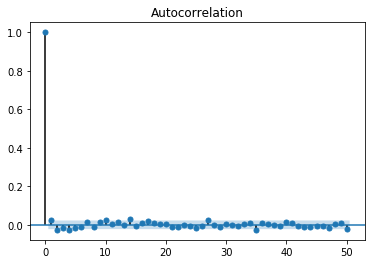

<Figure size 864x360 with 0 Axes>

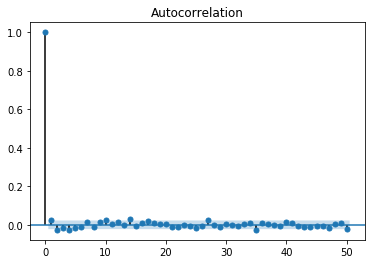

In [71]:
plot_acf(yield_df_dif, alpha=.05, lags = 50)

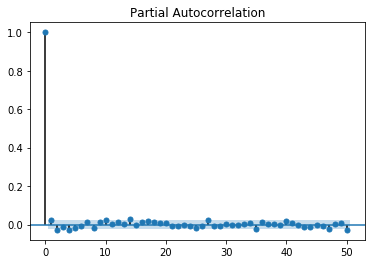

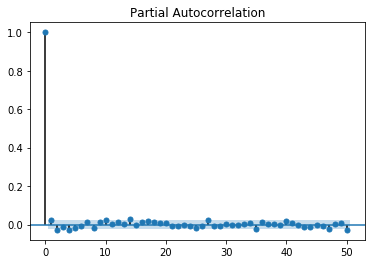

In [70]:
plot_pacf(yield_df_dif.iloc[1:,], alpha=.05, lags=50)